## 1) 프로젝트 목표 및 내용

이 프로젝트의 궁극적 목표는 “EPL 데이터 분석”이다. EPL 데이터를 우선
두가지 방면으로 시각화할 것이다. 득점 순위, 어시스트 순위 등 일반적으로
많이 만들어지는 시각화와 그렇지 않은 독특한 시각화가 그것이다. 그리고
리그 상위권들의 데이터를 분석하여 어떤 요인들이 승리에 크게
기여하였는지를 알아보는 것이 목표이다.

## 2) 주제 선정 이유

나는 평소에 축구에 관심이 많다. 그래서 해외 축구, 그 중에서도 특히 영국
축구리그인 EPL을 많이 보는 편이다. 그러다가 소융개론 Project 2를 위한
조사를 하던 중 AI로 축구 유망주를 분석하는 한국의 스타트업 “Bepro11”에
관심을 가지게 되었다. “Bepro11”에서 영감을 받아서, 나 또한 축구 데이터를
분석해보고 싶다는 생각이 들었다. EPL 최근 시즌 중에서는 2018/2019 시즌이
강팀 맨시티와 리버풀의 2파전으로 흥미로웠기 때문에 이 시즌을 선택했고,
해당 시즌을 분석해보기 위해 이 주제를 선정하였다.

## 3) 데이터 획득

분석에 가장 적합한 데이터를 찾아본 결과, 최종적으로
FootyStats(https://footystats.org/)의 데이터를 사용하기로 했다. 데이터가
CSV 파일 형태인 대신 유료였지만, EPL 18/19 시즌 데이터는 무료였기 때문에
이 데이터를 선택하였다. 데이터의 원본이 있는 페이지는
https://footystats.org/download-stats-csv# 이다.

해당 데이터는 크게 4가지로 나눌 수 있었다.

1.  League CSV: 리그 자체에 대한 여러가지 데이터가 나와있다. 총 경기수,
    평균 골 수 등이 있다.

2.  Matches CSV: 리그의 모든 경기 각각에 대한 데이터가 나와있다.
    홈팀/원정팀, 심판, 각팀 골 수 등이 있다.

3.  Teams CSV: 리그의 각 팀에 대한 데이터가 나와있다. 각 팀의 승점,
    순위, 경기수 등이 있다.

4.  Players CSV: 리그의 각 선수들에 대한 데이터가 나와있다. 득점수,
    어시스트수, 받은 카드수 등이 있다.

리그의 각 요소에 대한 방대한 데이터가 잘 정리되어있었기 때문에 분석에
용이할 것이라고 생각했다.

## 4) 구현 내용

### \[1. 일반적으로 이루어지는 데이터 시각화 재현\]

EPL 공식 사이트 (https://www.premierleague.com/) 를 보면, 아래 사진과
같이 득점/어시스트/태클/클린시트 등 대부분의 데이터를 <순위> -
<선수 이름> - <소속 클럽> - <국적> - <해당 데이터값>의 형태로 보여준다는
것을 알 수 있었다. 때문에 4개의 파일 중 “Players CSV” 파일에서 해당
요소들을 뽑아서 이 데이터 시각화를 동일하게 해보기로 하였다.

<img src="/images/1.png">

pandas, matplotlib, numpy import 하기

In [5]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

한국어 그래프 생성용

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.TTF"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

선수 파일열기/ 개요 확인

In [7]:
Player_Data = pd.read_csv('epl_players_18_19.csv')
Player_Data.head()

,full_name,age,birthday,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,30,629683200,Premier League,2018/2019,Defender,West Ham United,1589,888,701,...,1.25,72,79,1589,1589,0.06,290,191,80,20
1,Aaron Lennon,33,545526000,Premier League,2018/2019,Midfielder,Burnley,1217,487,730,...,1.48,61,76,1217,1217,0.07,199,187,-1,10
2,Aaron Mooy,29,653353200,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,1137,...,1.78,51,80,582,2327,0.15,147,233,-1,3
3,Aaron Ramsey,29,662169600,Premier League,2018/2019,Midfielder,Arsenal,1327,689,638,...,0.81,111,47,0,221,0.00,69,8,-1,5
4,Aaron Rowe,20,968281200,Premier League,2018/2019,Forward,Huddersfield Town,69,14,55,...,1.30,69,35,0,0,0.00,-1,-1,-1,31


데이터 순위 찾는 함수 organize_data()

In [8]:
def organize_data(data):
    
    # data 기준으로 정렬
    goals = Player_Data[['full_name', 'Current Club', 'nationality', data]]
    goals_Chart = goals.sort_values( by = data, ascending = False, ignore_index = True)

    # 증복 포함하는 순위 표시 리스트 만들기
    count = 0
    rank_list = [1]
    for i in range(0, 571):
        if(int(goals_Chart.iloc[i, 3]) != int(goals_Chart.iloc[i+1, 3])):
            count = i + 1
        rank_list.append(count+1)
    goals_Chart.index = rank_list
    display(goals_Chart.head(10))

실행해보기

In [9]:
organize_data('goals_overall')

,full_name,Current Club,nationality,goals_overall
1,Sadio Mané,Liverpool,Senegal,22
1,Mohamed Salah,Liverpool,Egypt,22
1,Pierre-Emerick Aubameyang,Arsenal,Gabon,22
4,Sergio Aguero,Manchester City,Argentina,21
5,Jamie Vardy,Leicester City,England,18
6,Raheem Sterling,Manchester City,England,17
6,Harry Kane,Tottenham Hotspur,England,17
8,Eden Hazard,Chelsea,Belgium,16
9,Callum Wilson,AFC Bournemouth,England,14
10,Gylfi Sigurdsson,Everton,Iceland,13


### \[2. 심판 성향 분석\]

각 심판이 평균적으로 한 경기에 몇개의 경고를 주었는지에 따라 해당 심판이
얼마나 엄격한 성향의 심판인지 분석해보는 것이 흥미로울 것 같다고
생각했다. “심판 이름”, “경기당 옐로우카드/레드카드 수”, “각 심판 출전
경기수” 데이터를 이용하여 아래 식으로 계산을 진행했다.

<img src="/images/2.png">

In [10]:
# 경기 데이터 불러오기
Matches_Data = pd.read_csv('epl_matches_18_19.csv')

# 심판, 카드 데이터만 따로 추출하기
referee = Matches_Data[['referee', 'home_team_yellow_cards', 'home_team_red_cards', 
                        'away_team_yellow_cards', 'away_team_red_cards']]

In [11]:
# 식에 따라 카드수, 경기수 계산
card_num = dict()
match_num = dict()
for i in range(0, 380):
    total = referee.iloc[i , 1] + referee.iloc[i , 2] + referee.iloc[i , 3] + referee.iloc[i , 4]
    if(referee.iloc[i , 0] in card_num.keys()): 
        card_num[referee.iloc[i , 0]] += total;
        match_num[referee.iloc[i , 0]] += 1;
    else: 
        card_num[referee.iloc[i , 0]] = total
        match_num[referee.iloc[i , 0]] = 1;
            
card_num = dict(sorted(card_num.items(), key=lambda x:x[0]))
match_num = dict(sorted(match_num.items(), key=lambda x:x[0]))

# 경기당 카드수(경기수/카드수) 계산
for i in card_num.keys():
    card_num[i] = card_num[i]/match_num[i]

x = sorted(card_num.items(), key=lambda x:x[1], reverse=True)
df = pd.DataFrame(x)
df.columns = ['심판', '경기당 카드수']
display(df.head(10))

,심판,경기당 카드수
0,Mike Dean,4.965517
1,Roger East,4.400000
2,Craig Pawson,3.807692
3,Jonathan Moss,3.777778
4,Kevin Friend,3.518519
5,Paul Tierney,3.458333
6,Lee Mason,3.368421
7,Anthony Taylor,3.218750
8,Chris Kavanagh,3.208333
9,Stuart Attwell,3.200000


실제 경기당 카드수가 가장 많은 Mike Dean 주심은 EPL에서 레드카드 100장을
최초로 발급한 심판이며, 카드를 많이 주는 성향의 베테랑 심판이다.
<img src="/images/3.png"> 
출처:
https://www.givemesport.com/1465625-mike-dean-becomes-the-first-referee-to-show-100-red-cards-in-the-premier-league

### \[3. 각 팀의 리그 성과 한눈에 보기\]

위에서 언급한 것처럼, 이 시즌은 맨시티와 리버풀 두팀이 다른 팀들에 비해
월등한 퍼포먼스를 보여준 시즌으로 유명하다. 따라서 어떤 데이터 항목들이
승리에 가장 큰 영향을 미쳤는지, 즉 승패와 연관도가 높은 데이터들을
찾아보기로 했다. 연관도를 찾아보는 데에는 히트맵을 활용할 계획이다.

팀 데이터 불러오기

In [12]:
import seaborn as sns 
Teams_Data = pd.read_csv('epl_teams_18_19.csv')
Teams_Data.head()

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_scored_min_81_to_90,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90
0,Arsenal FC,Arsenal,2018/2019,England,38,19,19,0,21,14,...,13,3,7,5,5,9,1,12,1,8
1,Tottenham Hotspur FC,Tottenham Hotspur,2018/2019,England,38,19,19,0,23,12,...,10,3,4,1,2,1,6,4,8,10
2,Manchester City FC,Manchester City,2018/2019,England,38,19,19,0,32,18,...,10,0,2,3,3,3,3,4,2,3
3,Leicester City FC,Leicester City,2018/2019,England,38,19,19,0,15,8,...,14,8,5,1,7,6,4,7,1,9
4,Crystal Palace FC,Crystal Palace,2018/2019,England,38,19,19,0,14,5,...,11,1,2,3,4,7,9,8,8,11


직관적으로 승리와 관련 있을 것 같은 요소들만 따로 분류하기

In [13]:
relatives = Teams_Data[['league_position', 'points_per_game', 'goals_scored', 'goals_conceded', 'goal_difference', 
                        'clean_sheets', 'average_possession', 'shots', 'shots_on_target']]

<Axes: >

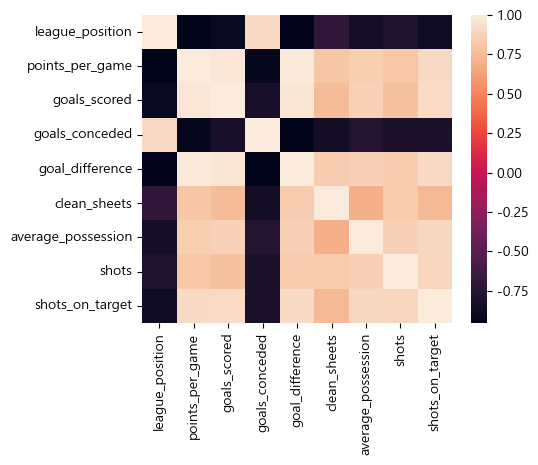

In [14]:
plt.figure(figsize = (5,4))
sns.heatmap(relatives.corr())

위 히트맵이 이상한 이유: 팀 순위, 실점은 적을수록 좋기 떄문에 높을수록
좋은 다른 데이터와 성향이 반대가 된다.

따라서 팀 순위, 실점을 각각 (20- 팀순위), -(실점) 으로 바꿔 높을수록
좋은 데이터로 바꿨다.

                     new_league_position  points_per_game  goals_scored  \
new_league_position             1.000000         0.954118      0.900407   
points_per_game                 0.954118         1.000000      0.971124   
goals_scored                    0.900407         0.971124      1.000000   
new_goals_conceded              0.906426         0.922231      0.831100   
goal_difference                 0.943743         0.990912      0.962685   
clean_sheets                    0.717073         0.807763      0.761770   
average_possession              0.846605         0.853584      0.864491   
shots                           0.799502         0.813270      0.783372   
shots_on_target                 0.879264         0.905648      0.910735   

                     new_goals_conceded  goal_difference  clean_sheets  \
new_league_position            0.906426         0.943743      0.717073   
points_per_game                0.922231         0.990912      0.807763   
goals_scored               

<Axes: >

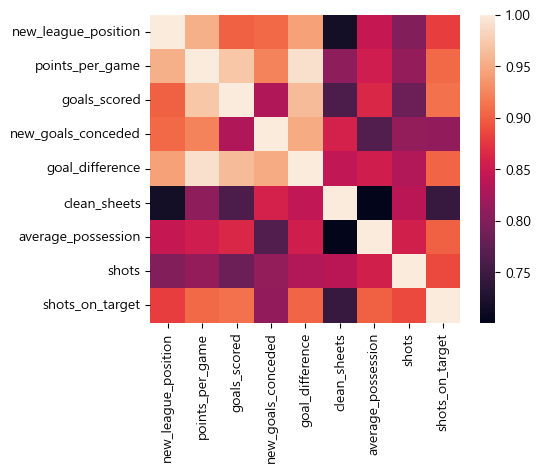

In [15]:
Teams_Data['new_league_position'] = 20 - Teams_Data['league_position']
Teams_Data['new_goals_conceded'] =  -Teams_Data['goals_conceded']

new_relatives = Teams_Data[['new_league_position', 'points_per_game', 'goals_scored', 'new_goals_conceded', 'goal_difference', 'clean_sheets', 'average_possession', 'shots', 'shots_on_target']]

plt.figure(figsize = (5,4))
print(new_relatives.corr())
sns.heatmap(new_relatives.corr())

히트맵을 분석한 결과, 리그 순위 항목(‘new_league_position’)과 가장
연관성이 높았던 데이터는

points_per_game(경기당 득점, 0.954118), goal_difference(득실 차,
0.943743) 이었다.

이 두 데이터를 이용하여 리그의 팀 20개를 그래프 상에 배치하여 각 팀의
경기력을 보기 쉽게 시각화해보기로 하였다.

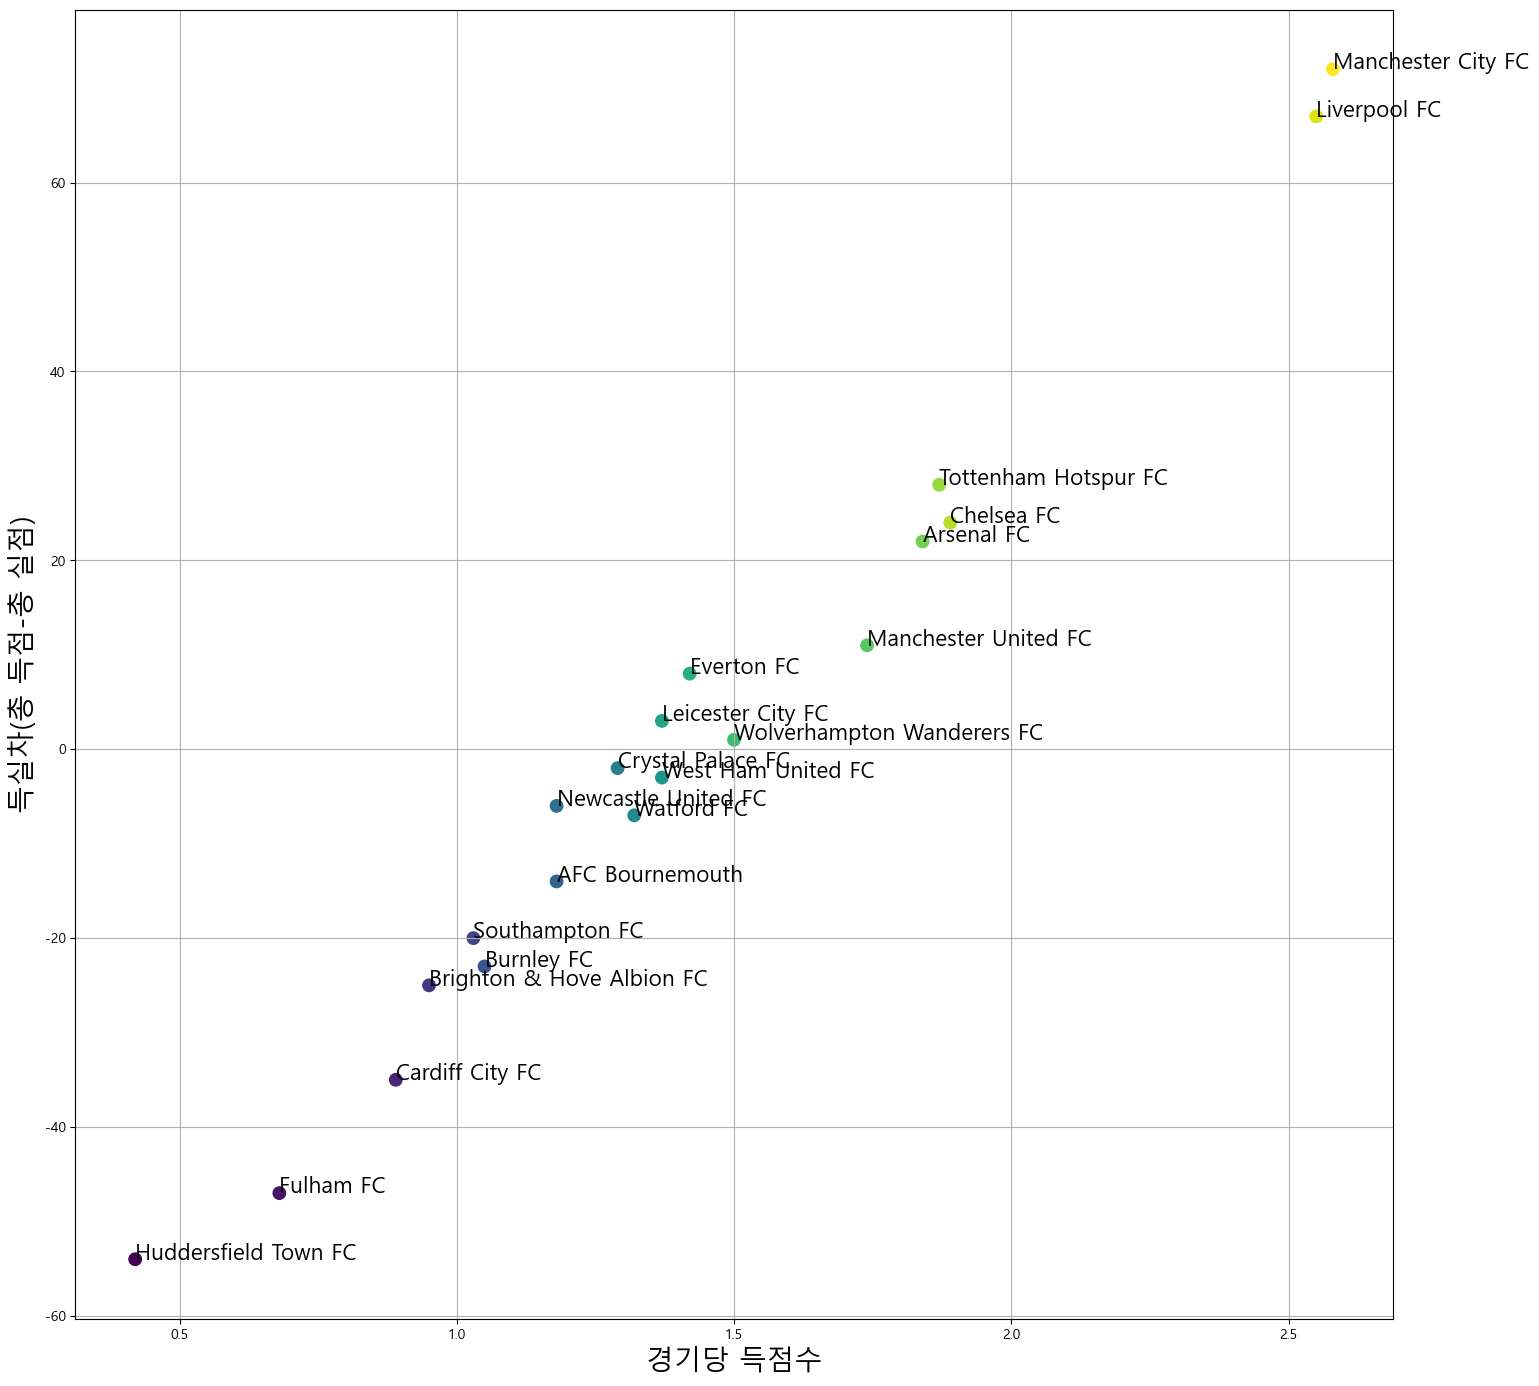

In [16]:
plt.figure(figsize=(17,17))
plt.scatter(Teams_Data['points_per_game'], Teams_Data['goal_difference'],c = new_relatives['new_league_position'], s = 80)

for i in range(20):
    plt.text(Teams_Data['points_per_game'][i], Teams_Data['goal_difference'][i], Teams_Data['team_name'][i], fontsize = 16)

plt.xlabel('경기당 득점수', fontsize = 20)
plt.ylabel('득실차(총 득점-총 실점)', fontsize = 20)

plt.grid()
plt.show()

그래프 생성 결과, 각 팀의 경기력을 한 눈에 보기 쉽게 되었다.

특히 프로젝트 초반부에 언급했던 맨체스터 시티와 리버풀간의 2파전이라는
것도 잘 드러난다.

## 5) 느낀 점

1.  데이터 원본(Raw Data)을 필요에 맞게 가공하는 능력이 중요하다.

이 부분에서 시간이 꽤 많이 소요된다는것을 느꼈으며, 처음부터 방대한
데이터 중 체계적으로 잘 정리된 데이터를 찾는 것도 중요하다.
<img src="/images/4.png">

2.  데이터가 최신(up to date)인 것이 중요함

EPL 공식 사이트에는 내가 직접 만든 데이터와 다르게 소속 클럽 항목이
공백으로 나와있었다. 그 이유는 그 선수들이 EPL이 아닌 다른 리그의
클럽으로 이적했기 때문이다. 실제로 이 경우에 에덴 아자르 선수는 이후
스페인 리그인 La Liga의 레알 마드리드로 이적했다. 이처럼 정확한 분석을
위해서는 최신의, 주기적으로 업데이트가 되는 데이터를 사용하는 것이
중요하다는 것을 느꼈다. <img src="/images/5.png">

3.  각 데이터 항목이 정확히 무엇을 의미하는 것인지를 잘 살펴봐야 한다.

‘클린 시트’ 순위 데이터에서, EPL 사이트는 골키퍼만 표시되는 반면 분석
데이터에서는 모든 선수들이 표시되었다. 즉 같은 항목이 의미하는 것이
달랐던 것이다. 이런 경우 때문에 각 파일에서 데이터가 나타내는 내용을
정확하게 파악해야 한다. <img src="/images/6.png">

## 6) 소감

내가 좋아하는 축구 관련 데이터를 분석해보게 되어서 재미있었다. 해당
프로젝트를 통해 기초적인 내용이지만 데이터를 분석/시각화 하는 더 많은
방법들에 대해서 배웠다. 그리고 그 방법들을 python의 기능들을 활용하여
구현하는 법에 대해서도 많이 배울 수 있었다.

데이터 분석 방법들과 python의 도구들은 이후에 진행할 프로젝트들 에서도
유용하게 쓰일 것 같다. 데이터로 유의미한 결과를 만들어내는 과정이
즐거웠고, 이후의 활동에서도 이를 다시 한번 느껴보고 싶다.

## 7) 참고 문헌

1.  FootyStats(https://footystats.org/): 데이터 원본을 획득한 사이트

2.  EPL 공식 사이트(https://www.premierleague.com/): 경기 데이터가 어떤
    방식으로 정리되고 활용되는지 참고한 사이트

3.  Kaggle(https://www.kaggle.com/): 데이터를 가공하는 여러가지 방법들을
    배운 사이트